<a href="https://colab.research.google.com/github/anhhao04/NguyenAnhHao-20104006.github.io/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Food

/content/drive/MyDrive/Colab Notebooks/Food


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 633 images belonging to 10 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 633 images belonging to 10 classes.


In [ ]:
x_train.class_indices

{'Banh chung': 0,
 'Banh gio': 1,
 'Banh mi': 2,
 'Banh pia': 3,
 'Banh trang nuong': 4,
 'Banh xeo': 5,
 'Bánh bèo': 6,
 'Bánh bông lan': 7,
 'Bún đậu': 8,
 'Nem chua': 9}

In [ ]:
validation.class_indices

{'Banh chung': 0,
 'Banh gio': 1,
 'Banh mi': 2,
 'Banh pia': 3,
 'Banh trang nuong': 4,
 'Banh xeo': 5,
 'Bánh bèo': 6,
 'Bánh bông lan': 7,
 'Bún đậu': 8,
 'Nem chua': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
20/20 [==============================] - 194s 10s/step - loss: 3.6171 - accuracy: 0.1169 - val_loss: 2.2567 - val_accuracy: 0.1975
Epoch 2/50
20/20 [==============================] - 80s 4s/step - loss: 2.1514 - accuracy: 0.2196 - val_loss: 1.9188 - val_accuracy: 0.3160
Epoch 3/50
20/20 [==============================] - 82s 4s/step - loss: 1.9968 - accuracy: 0.3065 - val_loss: 1.9399 - val_accuracy: 0.3586
Epoch 4/50
20/20 [==============================] - 81s 4s/step - loss: 1.8328 - accuracy: 0.3934 - val_loss: 1.7126 - val_accuracy: 0.4139
Epoch 5/50
20/20 [==============================] - 81s 4s/step - loss: 1.7277 - accuracy: 0.3839 - val_loss: 1.6151 - val_accuracy: 0.4013
Epoch 6/50
20/20 [==============================] - 80s 4s/step - loss: 1.6642 - accuracy: 0.4171 - val_loss: 1.4851 - val_accuracy: 0.4550
Epoch 7/50
20/20 [==============================] - 80s 4s/step - loss: 1.4449 - accuracy: 0.4929 - val_loss: 1.4496 - val_accuracy: 0.4897
Epoch 8/50
20/20 [

In [ ]:
Score=model.evaluate(x_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.07911655306816101
Train Accuracy 0.9794628620147705


<function matplotlib.pyplot.show(*args, **kw)>

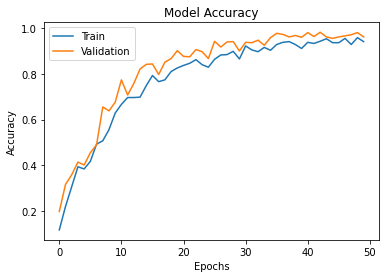

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Đồ ăn.h5")

In [ ]:
model_CNN=load_model('Đồ ăn.h5')

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/Food/Test _random"

1/1 [==============================] - 0s 44ms/step
BÁNH GIÒ


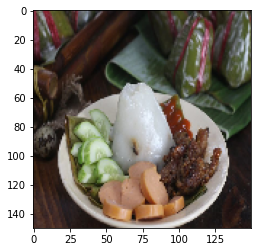

1/1 [==============================] - 0s 41ms/step
BÁNH GIÒ


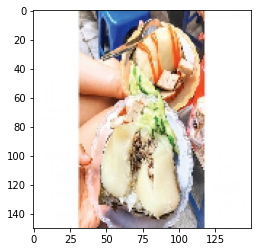

1/1 [==============================] - 0s 45ms/step
BÁNH GIÒ


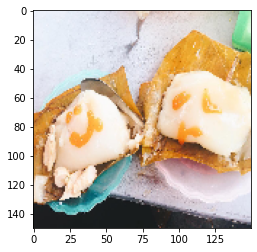

1/1 [==============================] - 0s 49ms/step
BÁNH MÌ


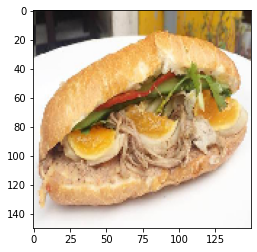

1/1 [==============================] - 0s 40ms/step
BÁNH PÍA


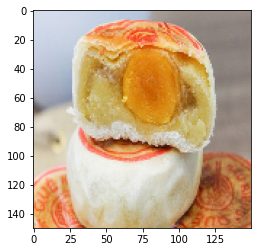

1/1 [==============================] - 0s 40ms/step
BÁNH MÌ


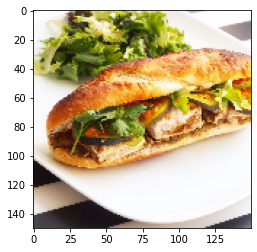

1/1 [==============================] - 0s 41ms/step
BÁNH PÍA


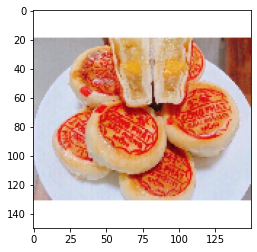

1/1 [==============================] - 0s 40ms/step
BÁNH PÍA


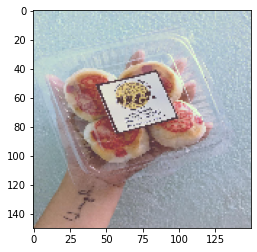

1/1 [==============================] - 0s 45ms/step
BÁNH XÈO


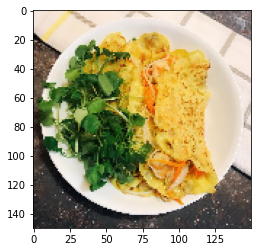

1/1 [==============================] - 0s 41ms/step
BÁNH XÈO


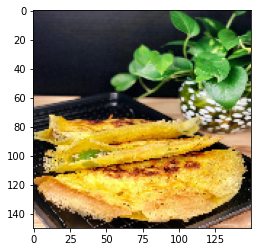

1/1 [==============================] - 0s 39ms/step
NEM CHUA


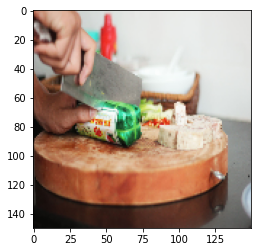

1/1 [==============================] - 0s 44ms/step
NEM CHUA


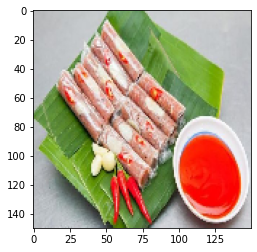

1/1 [==============================] - 0s 39ms/step
NEM CHUA


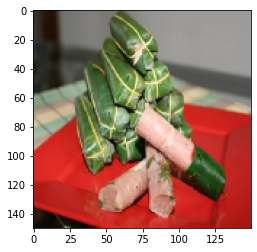

1/1 [==============================] - 0s 41ms/step
BÁNH BÈO


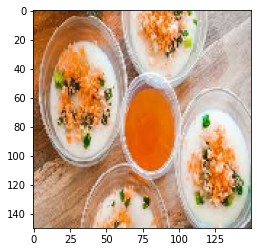

1/1 [==============================] - 0s 43ms/step
BÚN ĐẬU MẮM TÔM


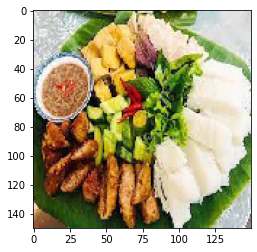

1/1 [==============================] - 0s 45ms/step
BÚN ĐẬU MẮM TÔM


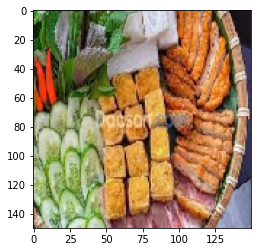

1/1 [==============================] - 0s 49ms/step
BÁNH BÔNG LAN


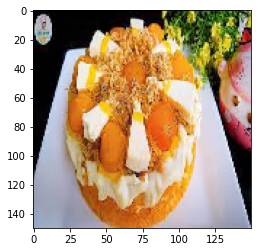

In [ ]:
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BÁNH CHƯNG'
  if round(result[0][1])==1:
    prediction='BÁNH GIÒ'
  if round(result[0][2])==1:
    prediction='BÁNH MÌ'
  if round(result[0][3])==1:
    prediction='BÁNH PÍA'
  if round(result[0][4])==1:
    prediction='BÁNH TRÁNG NƯỚNG'
  if round(result[0][5])==1:
    prediction='BÁNH XÈO'
  if round(result[0][6])==1:
    prediction='BÁNH BÈO'
  if round(result[0][7])==1:
    prediction='BÁNH BÔNG LAN'
  if round(result[0][8])==1:
    prediction='BÚN ĐẬU MẮM TÔM'
  if round(result[0][9])==1:
    prediction='NEM CHUA'
  print(prediction)
  plt.show()